In [1]:
print('RLNC Performance Study')

RLNC Performance Study


/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


204.0


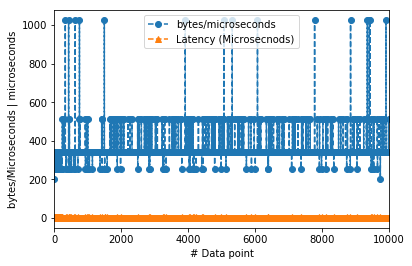

In [17]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508831673_full_vector_encoder_0_8_128')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_8_128.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


3.0


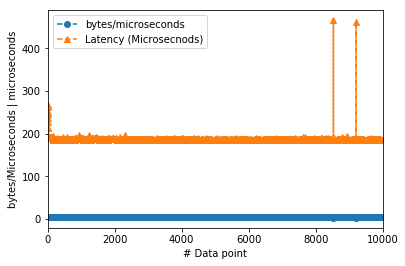

In [16]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508831834_full_vector_encoder_0_128_8')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_128_8.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


113.0


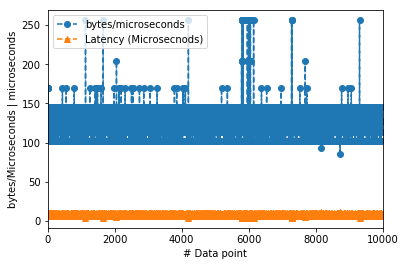

In [15]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508833960_full_vector_encoder_0_16_64')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_16_64.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


10.0


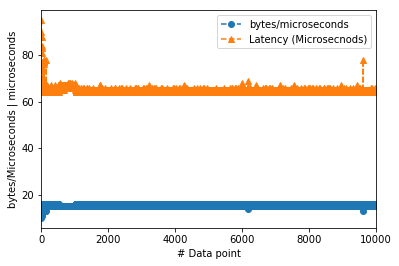

In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508834446_full_vector_encoder_0_64_16')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_64_16.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


2.0


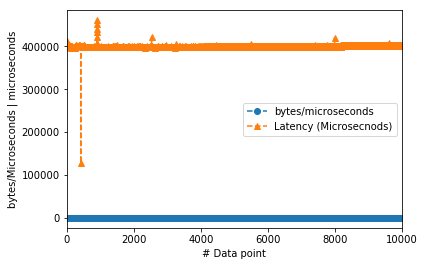

In [3]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508851532_full_vector_encoder_0_4096_256')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_4096_256.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


64.0


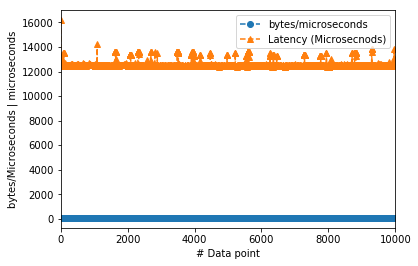

In [4]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508926128_full_vector_encoder_0_256_4096')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_64_16.eps')
plt.show()

/home/tools/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


64.0


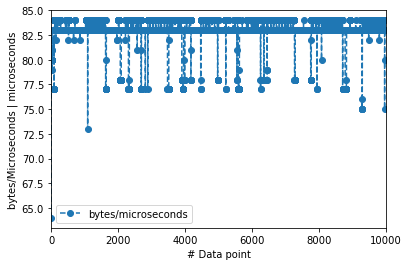

In [5]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1508926128_full_vector_encoder_0_256_4096')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])

print(throughput[0])

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

#ts_2 = pd.Series(latency)
#pd.to_numeric(ts_2)
#latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/microseconds', 'Latency (Microsecnods)'])
plt.ylabel('bytes/Microseconds | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_throughput_only_0_256_4096.eps')
plt.show()